In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as connector
import warnings
warnings.filterwarnings("ignore")


In [2]:
conn = connector.connect(
   host="localhost",      # or "127.0.0.1"
    user="root",           # your MySQL username
    password="1234",
    database="world"
)

In [3]:
query = """
SHOW TABLES
"""
df = pd.read_sql(query, conn)
df.head()

,Tables_in_world
0,city
1,country
2,countrylanguage


How many columns there are in table?

In [10]:
query = """SHOW COLUMNS FROM country"""

df = pd.read_sql(query, conn)
df

,Field,Type,Null,Key,Default,Extra
0,Code,char(3),NO,PRI,,
1,Name,char(52),NO,,,
2,Continent,"enum('Asia','Europe','North America','Africa',...",NO,,Asia,
3,Region,char(26),NO,,,
4,SurfaceArea,"decimal(10,2)",NO,,0.00,
5,IndepYear,smallint,YES,,None,
6,Population,int,NO,,0,
7,LifeExpectancy,"decimal(3,1)",YES,,None,
8,GNP,"decimal(10,2)",YES,,None,
9,GNPOld,"decimal(10,2)",YES,,None,


How many countries there are?

In [4]:
query = """SELECT COUNT(*) AS total_countries FROM country;
"""
df = pd.read_sql(query, conn)
df

,total_countries
0,239


How many countries there in continent?

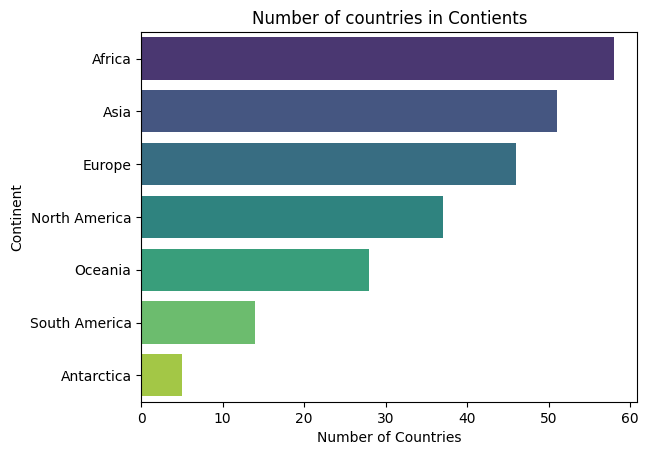

In [ ]:
query = """SELECT Continent, COUNT(*) AS NumberOfCountries FROM country GROUP BY Continent ORDER BY NumberOfCountries DESC"""

df = pd.read_sql(query, conn)

sns.barplot(
    x="NumberOfCountries", 
    y="Continent", 
    data=df, 
    palette="viridis"
)
plt.title("Number of countries in Contients")
plt.xlabel("Number of Countries")
plt.ylabel("Continent")
plt.show()
